In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [7]:
import numpy as np
import pandas as pd # read_csv, get_dumies(원핫인코딩)
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

타겟변수가 될 와인 등급 종류 :  [5 6 7 4 8 3]
(1119, 11) (1119, 6) (480, 11) (480, 6)
Epoch 1/50
5/5 [==============================] - 0s 35ms/step - loss: 1.6831 - accuracy: 0.2916 - val_loss: 1.5933 - val_accuracy: 0.3795
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 1.5675 - accuracy: 0.4335 - val_loss: 1.4863 - val_accuracy: 0.4777
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 1.4735 - accuracy: 0.4872 - val_loss: 1.3880 - val_accuracy: 0.4866
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 1.3726 - accuracy: 0.5039 - val_loss: 1.2969 - val_accuracy: 0.5134
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 1.2905 - accuracy: 0.5330 - val_loss: 1.2143 - val_accuracy: 0.5357
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 1.2190 - accuracy: 0.5441 - val_loss: 1.1447 - val_accuracy: 0.5670
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 1.1654 - accuracy: 0.5531 -

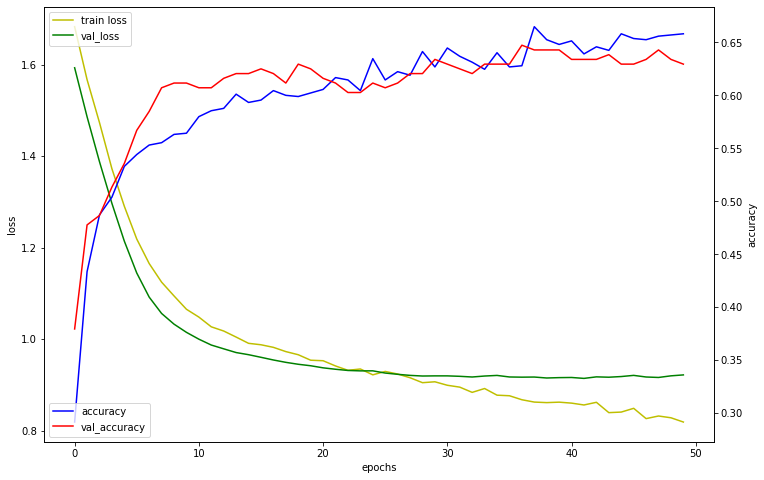

In [8]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # to_numpy()함수는 values와 유사
redwine_y = redwine.iloc[:,-1]
print('타겟변수가 될 와인 등급 종류 : ', redwine_y.unique()) # 3,4,5,6,7,8 

# 독립변수 scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 타겟변수 원핫인코딩(라벨링 전환) 후 numpy 배열로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy()

# 훈련셋과 테스트셋 분리 (7:3)
train_X, test_X, train_Y, test_Y = train_test_split(redwine_x, redwine_y,
                                 test_size=0.3, random_state=1)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11)) # 의미있는 레이어가 아니고 input_dim만 지정
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=6, activation="softmax")) # 3 4 5 6 7 8 등급의 결과 합이 1

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
earlyStropping = EarlyStopping(patience=20)
hist = model.fit(train_X, train_Y, epochs=50, batch_size=200, 
                validation_split=0.2, callbacks=[earlyStropping])

# 5. 모델 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'], 'b', label='accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [9]:
# 6. 모델 평가하기
loss_and_acc = model.evaluate(test_X, test_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.9574 - accuracy: 0.5917
loss :  0.9574285745620728
accuracy :  0.5916666388511658


In [21]:
# 7. 성능 지표(crosstab)
# pred = model.predict(test_X).argmax(axis=1)+3
pred = np.argmax(model.predict(test_X), axis=1)+3
# real = test_Y.argmax(axis=1) + 3
real = np.argmax(test_Y, axis=1) +3
cross_tab = pd.crosstab(real, pred)
cross_tab.index.name = "real"
cross_tab.columns.name = 'predict'
cross_tab

predict,5,6,7
real,,,
3,2,0,0
4,13,7,1
5,156,47,4
6,58,107,30
7,4,27,21
8,0,0,3


In [28]:
# 6. 모델 사용하기
input_data = np.array([7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4])
scaled_data = scaler.transform(input_data.reshape(1,11))
np.argmax(model.predict(scaled_data), axis=1) + 3

array([5], dtype=int64)